# 1강

### WordNet
- 유의어(Synonym)과 상의어(Hypernym)들의 집합을 포함하고 있는 백과사전.

In [1]:
import nltk
#nltk.download('wordnet')
#nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sjkan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\sjkan\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\omw-1.4.zip.


True

In [2]:
from nltk.corpus import wordnet as wn

poses = {'n' : 'noun', 'v' : 'verb', 's' : 'adj(s)', 'a' : 'adj', 'r' : 'adv'}

#### "Good" 의 동의어 셋

In [3]:
for synset in wn.synsets ('good') :
    print('{}:{}'.format(poses[synset.pos()],
                         ",".join([l.name() for l in synset.lemmas()])))

noun:good
noun:good,goodness
noun:good,goodness
noun:commodity,trade_good,good
adj:good
adj(s):full,good
adj:good
adj(s):estimable,good,honorable,respectable
adj(s):beneficial,good
adj(s):good
adj(s):good,just,upright
adj(s):adept,expert,good,practiced,proficient,skillful,skilful
adj(s):good
adj(s):dear,good,near
adj(s):dependable,good,safe,secure
adj(s):good,right,ripe
adj(s):good,well
adj(s):effective,good,in_effect,in_force
adj(s):good
adj(s):good,serious
adj(s):good,sound
adj(s):good,salutary
adj(s):good,honest
adj(s):good,undecomposed,unspoiled,unspoilt
adj(s):good
adv:well,good
adv:thoroughly,soundly,good


#### panda 의 상의어

In [4]:
from nltk.corpus import wordnet as wn

panda = wn.synset('panda.n.01')
hyper = lambda s: s.hypernyms()
list(panda.closure(hyper))

[Synset('procyonid.n.01'),
 Synset('carnivore.n.01'),
 Synset('placental.n.01'),
 Synset('mammal.n.01'),
 Synset('vertebrate.n.01'),
 Synset('chordate.n.01'),
 Synset('animal.n.01'),
 Synset('organism.n.01'),
 Synset('living_thing.n.01'),
 Synset('whole.n.02'),
 Synset('object.n.01'),
 Synset('physical_entity.n.01'),
 Synset('entity.n.01')]

- 우리는 단어들의 의미 간의 유사도/관계를 찾고 싶은데, 잘 되지 않음.

  ✓ 사람들이 손수 분류한 Fixed Discrete Synonym Set이라서 뉘앙스를 많이 잃어버리게 된다.

  ✓ 신조어들을 많이 포함하고 있지 않을 뿐만 아니라 계속 업데이트하는 것도 실질적으로 불가능하다.

# Gensim word vector visualization of various word vectors

In [5]:
import numpy as np
%matplotlib notebook
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

from gensim.test.utils import datapath, get_tmpfile
from gensim.models import KeyedVectors
from gensim.scripts.glove2word2vec import glove2word2vec

In [6]:
glove_file = datapath('C:\\Users\\sjkan\\AppData\\Roaming\\nltk_data\\corpora\\glove.6B.100d.txt')

In [7]:
word2vec_glove_file = get_tmpfile("glove.6B.100d.word2vec.txt")
glove2word2vec(glove_file, word2vec_glove_file)

C:\Users\sjkan\AppData\Local\Temp\ipykernel_20848\4154770792.py:2: DeprecationWarning: Call to deprecated `glove2word2vec` (KeyedVectors.load_word2vec_format(.., binary=False, no_header=True) loads GLoVE text vectors.).
  glove2word2vec(glove_file, word2vec_glove_file)


(400000, 100)

In [8]:
model = KeyedVectors.load_word2vec_format(word2vec_glove_file)

In [9]:
model.most_similar('obama')

[('barack', 0.937216579914093),
 ('bush', 0.9272855520248413),
 ('clinton', 0.896000325679779),
 ('mccain', 0.8875634074211121),
 ('gore', 0.8000320196151733),
 ('hillary', 0.7933663129806519),
 ('dole', 0.7851963639259338),
 ('rodham', 0.7518897652626038),
 ('romney', 0.7488929629325867),
 ('kerry', 0.7472624182701111)]

In [10]:
model.most_similar(negative='banana')

[('shunichi', 0.49618104100227356),
 ('ieronymos', 0.4736502170562744),
 ('pengrowth', 0.4668096601963043),
 ('höss', 0.4636845886707306),
 ('damaskinos', 0.46178486943244934),
 ('yadin', 0.4617375135421753),
 ('hundertwasser', 0.458895742893219),
 ('ncpa', 0.4577339291572571),
 ('maccormac', 0.45661094784736633),
 ('rothfeld', 0.4523947536945343)]

In [11]:
result = model.most_similar(positive=['woman', 'king'], negative=['man'])
print("{}: {:.4f}".format(*result[0]))

queen: 0.7699


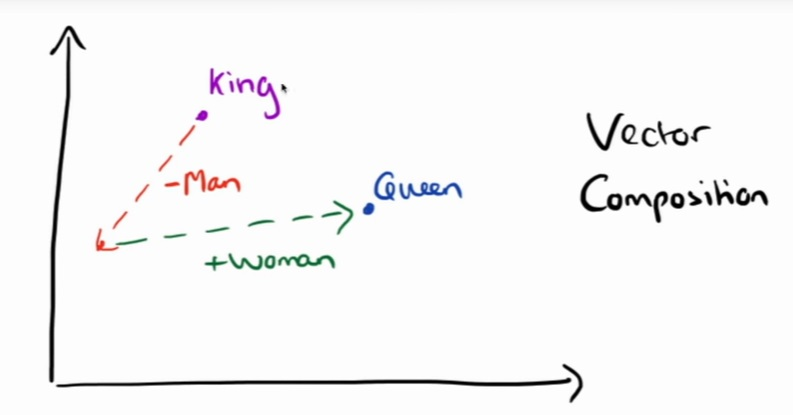

In [6]:
from IPython.display import Image

Image('C:\\Users\\sjkan\\Desktop\\YBIGTA\\nlp\\vector composition.jpg')

In [13]:
def analogy(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [14]:
analogy('japan', 'japanese', 'austria')

'austrian'

In [15]:
analogy('korea', 'korean', 'austria')

'austrian'

In [16]:
print(model.doesnt_match("breakfast cereal dinner lunch".split()))

cereal


----

# 2강

In [10]:
def display_pca_scatterplot(model, words=None, sample=0):
    if words == None:
        if sample > 0:
            words = np.random.choice(list(model.key_to_index), sample)
        else:
            words = [ word for word in model.vocab ]
        
    word_vectors = np.array([model[w] for w in words])
    
    twodim = PCA().fit_transform(word_vectors)[:,:2]
    
    plt.figure(figsize=(6,6))
    plt.scatter(twodim[:,0], twodim[:,1], edgecolors='k', c='r')
    for word, (x,y) in zip(words, twodim):
        plt.text(x+0.05, y+0.05, word)

In [11]:
display_pca_scatterplot(model,
                           ['coffee', 'tea', 'beer','wine','brandy','rum',
                            'spaghetti','hamburger','pizza',
                            'dog','horse','cat','monkey','parrot','koala','frog','toad','ape','kangaroo','wombat',
                            'france','germany','hungary','luxembourg',
                            'homework','assignment','problem','exam','test',
                            'school','college','university','institute'])

NameError: name 'model' is not defined

In [7]:
display_pca_scatterplot(model, sample=300)

NameError: name 'display_pca_scatterplot' is not defined